# Iris dataset
-  Network with softmax at the output

In [18]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [19]:
# Read data
iris = datasets.load_iris()
# Extract the last 2 columns
X = iris.data
y = iris.target
# Split data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)
# Standardization
sc = StandardScaler()
sc.fit(X_train)
#X_train_std = sc.transform(X_train)
#X_test_std = sc.transform(X_test)

X_train_std = X_train
X_test_std = X_test

In [20]:
tf.keras.backend.clear_session()
model = tf.keras.Sequential([
    tf.keras.Input(shape=(4,)),
    tf.keras.layers.Dense(16, activation='sigmoid', name='fc1'),
    tf.keras.layers.Dense(3, name='fc2', activation='softmax')
    ])

model.summary()

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
fc1 (Dense)                  (None, 16)                80        
_________________________________________________________________
fc2 (Dense)                  (None, 3)                 51        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [21]:
history = model.fit(X_train, y_train,
        batch_size=2,
        epochs=100, 
        verbose=1)

Epoch 1/100
53/53 [==============================] - 0s 396us/step - loss: 1.1838 - accuracy: 0.3333
Epoch 2/100
53/53 [==============================] - 0s 377us/step - loss: 1.0688 - accuracy: 0.4762
Epoch 3/100
53/53 [==============================] - 0s 359us/step - loss: 1.0274 - accuracy: 0.6667
Epoch 4/100
53/53 [==============================] - 0s 340us/step - loss: 0.9901 - accuracy: 0.6667
Epoch 5/100
53/53 [==============================] - 0s 377us/step - loss: 0.9569 - accuracy: 0.6667
Epoch 6/100
53/53 [==============================] - 0s 349us/step - loss: 0.9195 - accuracy: 0.6667
Epoch 7/100
53/53 [==============================] - 0s 340us/step - loss: 0.8809 - accuracy: 0.6381
Epoch 8/100
53/53 [==============================] - 0s 359us/step - loss: 0.8405 - accuracy: 0.6762
Epoch 9/100
53/53 [==============================] - 0s 340us/step - loss: 0.8030 - accuracy: 0.6667
Epoch 10/100
53/53 [==============================] - 0s 361us/step - loss: 0.7674 - accura

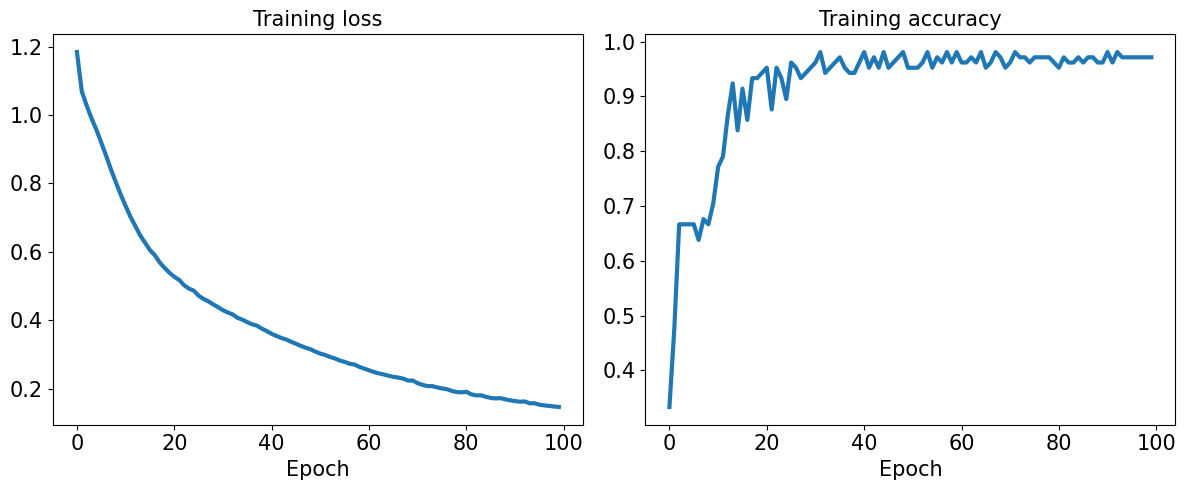

In [22]:
hist = history.history

fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(hist['loss'], lw=3)
ax.set_title('Training loss', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(hist['accuracy'], lw=3)
ax.set_title('Training accuracy', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()
#plt.savefig('ch13-cls-learning-curve.pdf')

plt.show()

In [23]:
results = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {results[0]:.4f}   Test Acc.: {results[1]:.4f}')

Test loss: 0.1321   Test Acc.: 0.9778


In [24]:
y_hat = model(X_test[:3])
print(y_hat.numpy())

[[2.1604520e-04 1.3690466e-01 8.6287928e-01]
 [9.8974812e-01 1.0250528e-02 1.3858775e-06]
 [9.8832047e-01 1.1677947e-02 1.6412005e-06]]


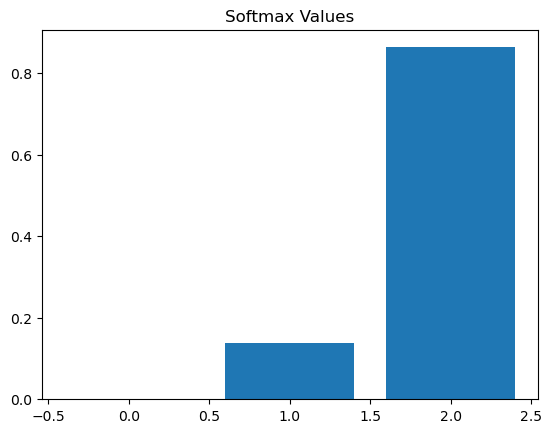

In [25]:
yp = y_hat.numpy()[0]
xp = list(range(yp.shape[0]))
plt.bar(xp, yp)
plt.title('Softmax Values')
plt.show()